In [23]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [24]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [25]:
samples = gen_quant.sample(data={'M':9}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


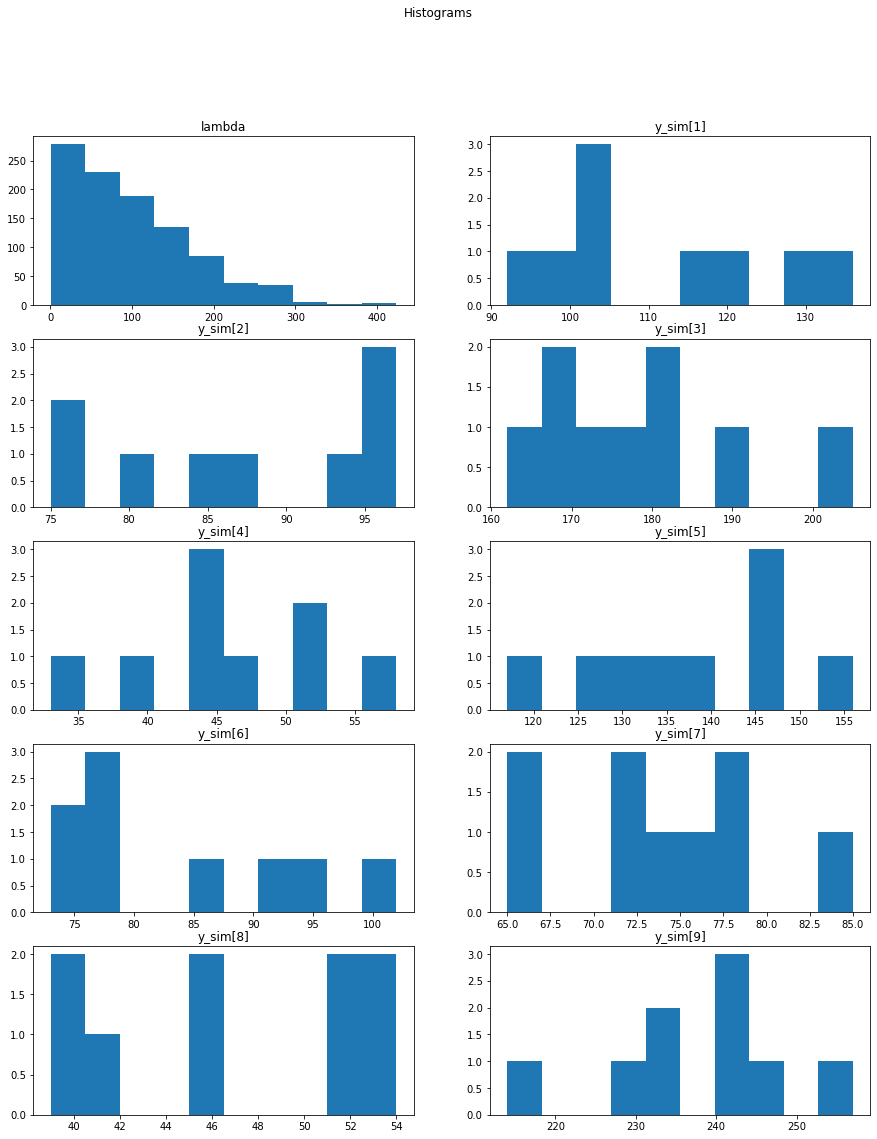

          Mean  MCSE  StdDev   5%  50%    95%  N_Eff  N_Eff/s  R_hat
name                                                                
lp__         0   NaN       0  0.0    0    0.0    NaN      NaN    NaN
lambda      98   2.5      74  7.9   84  250.0  870.0  32000.0    1.0
y_sim[1]    98   2.5      75  7.0   83  245.0  869.0  32178.0    1.0
y_sim[2]    98   2.6      76  7.0   82  245.0  882.0  32660.0    1.0
y_sim[3]    97   2.5      75  7.0   83  245.0  879.0  32559.0    1.0
y_sim[4]    98   2.5      75  8.0   82  251.0  872.0  32291.0    1.0
y_sim[5]    98   2.6      75  8.0   83  248.0  825.0  30544.0    1.0
y_sim[6]    98   2.5      75  8.0   81  247.0  879.0  32562.0    1.0
y_sim[7]    98   2.5      75  8.0   84  244.0  906.0  33546.0    1.0
y_sim[8]    97   2.5      74  8.0   82  246.0  916.0  33920.0    1.0
y_sim[9]    98   2.6      75  7.0   81  247.0  858.0  31790.0    1.0


In [26]:
lam = samples.stan_variable('lambda')
y_sim = samples.stan_variable('y_sim')
fig, axs = plt.subplots(5,2, figsize=(15,18))
fig.suptitle('Histograms')
axs[0][0].hist(lam, bins = 10)
axs[0][1].hist(y_sim[1], bins = 10)
axs[1][0].hist(y_sim[2], bins = 10)
axs[1][1].hist(y_sim[3], bins = 10)
axs[2][0].hist(y_sim[4], bins = 10)
axs[2][1].hist(y_sim[5], bins = 10)
axs[3][0].hist(y_sim[6], bins = 10)
axs[3][1].hist(y_sim[7], bins = 10)
axs[4][0].hist(y_sim[8], bins = 10)
axs[4][1].hist(y_sim[9], bins = 10)
axs[0][0].title.set_text('lambda')
axs[0][1].title.set_text('y_sim[1]')
axs[1][0].title.set_text('y_sim[2]')
axs[1][1].title.set_text('y_sim[3]')
axs[2][0].title.set_text('y_sim[4]')
axs[2][1].title.set_text('y_sim[5]')
axs[3][0].title.set_text('y_sim[6]')
axs[3][1].title.set_text('y_sim[7]')
axs[4][0].title.set_text('y_sim[8]')
axs[4][1].title.set_text('y_sim[9]')
plt.show()
df = samples.summary()
print(df)




## Excercise 2 - Constraints on the data 

In [27]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_2.stan', line 10, column 3 to column 24)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\code_2.exe', 'id=1', 'random', 'seed=3944', 'data', 'file=C:\\Users\\adams\\AppData\\Local\\Temp\\tmpj4ecf6b9\\7c4zso5j.json', 'output', 'file=C:\\Users\\adams\\AppData\\Local\\Temp\\tmpj4ecf6b9\\code_2-20220314222020_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\adams\AppData\Local\Temp\tmpj4ecf6b9\code_2-20220314222020_1.csv
 console_msgs (if any):
	C:\Users\adams\AppData\Local\Temp\tmpj4ecf6b9\code_2-20220314222020_0-stdout.txt

In [28]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/adams/OneDrive/Pulpit/DATAAN~1/DATA_A~1/ex_2/code_3.stan', line 3, column 4 to column 30)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\code_3.exe', 'id=1', 'random', 'seed=72636', 'data', 'file=C:\\Users\\adams\\AppData\\Local\\Temp\\tmpj4ecf6b9\\4r8yznmf.json', 'output', 'file=C:\\Users\\adams\\AppData\\Local\\Temp\\tmpj4ecf6b9\\code_3-20220314222035_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\adams\AppData\Local\Temp\tmpj4ecf6b9\code_3-20220314222035_1.csv
 console_msgs (if any):
	C:\Users\adams\AppData\Local\Temp\tmpj4ecf6b9\code_3-20220314222035_0-stdout.txt

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [29]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▌         | 00:00 Iteration:  200 / 7000 [  2%]  (Warmup)


chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |████▊     | 00:00 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |███████▏  | 00:00 Iteration: 4900 / 7000 [ 70%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 6600 / 7000 [ 94%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_4-20220314222042_1.csv, C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_4-20220314222042_2.csv, C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_4-20220314222042_3.csv, C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_4-20220314222042_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size sat

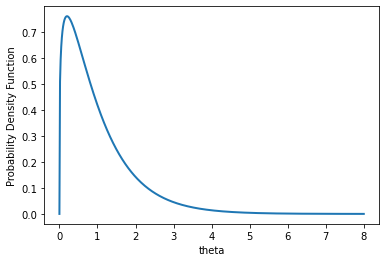

In [30]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [31]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Iteration:  100 / 7000 [  1%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |██████    | 00:00 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |█████████▎| 00:00 Iteration: 6400 / 7000 [ 91%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_5-20220314222051_1.csv, C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_5-20220314222051_2.csv, C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_5-20220314222051_3.csv, C:\\Users\\adams\\OneDrive\\Pulpit\\data analytics\\Data_Analytics\\ex_2\\samples\\code_5-20220314222051_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfa

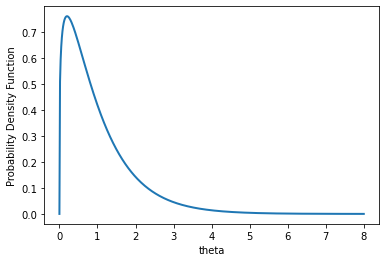

In [32]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [33]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 4
L = 5
y0 = 0

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Excercise 5 - different methods of defining models


In [48]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 30071999 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


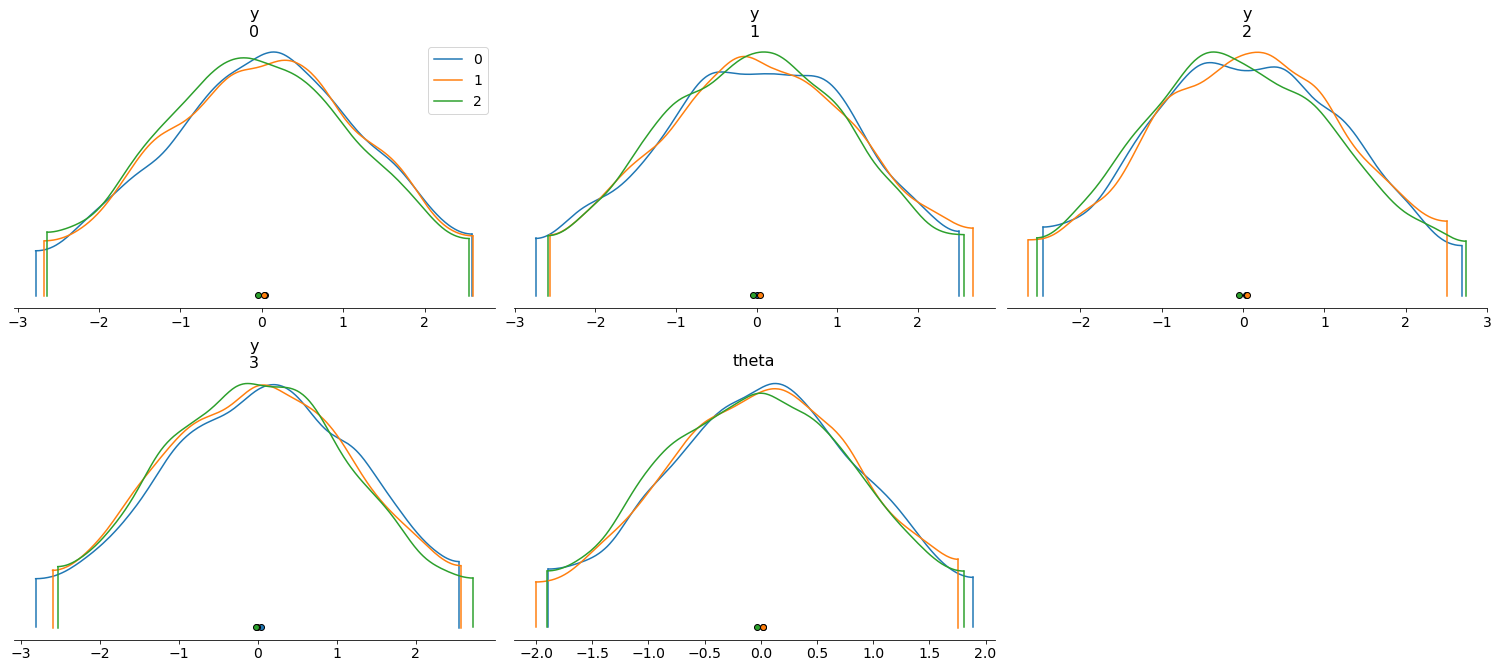

In [49]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


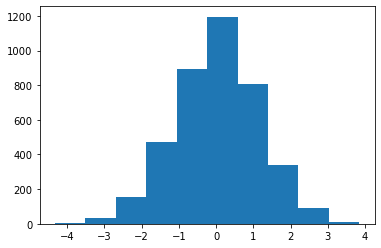

In [47]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variableŌ
df = mean_of_y.draws_pd()
plt.hist(df['mean_y'])
plt.show()